# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Code

## Code for Data Validation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
sales=pd.read_csv("product_sales.csv")

In [18]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [10]:
#Checks if there are null values
sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [12]:
#Checks if there are duplicated values
sales.duplicated().sum()

0

In [8]:
sales["sales_method"].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [5]:
#Transforms the column sales_method to solve the naming issue
sales['sales_method'] = sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

In [82]:
sales["sales_method"].value_counts()

In [7]:
#Transform the revenue column to fix the missing values
sales['revenue'] = sales.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.median()))

## Code for Exploratory analysis

### Number of customers

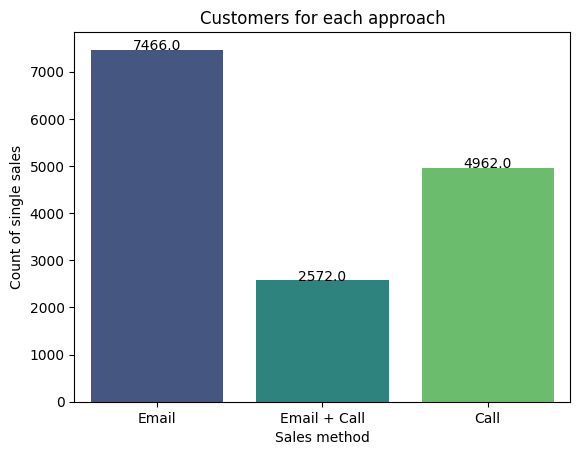

In [9]:
ax = sns.countplot(x="sales_method", data=sales, palette="viridis")


fig = plt.gcf()


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height}', ha="center")


plt.title("Customers for each approach")
plt.xlabel('Sales method')
plt.ylabel('Count of single sales')
plt.show()

### Spread of **revenue**

Text(0.5, 1.0, 'Overall distribution of sales without differentiation by sales method')

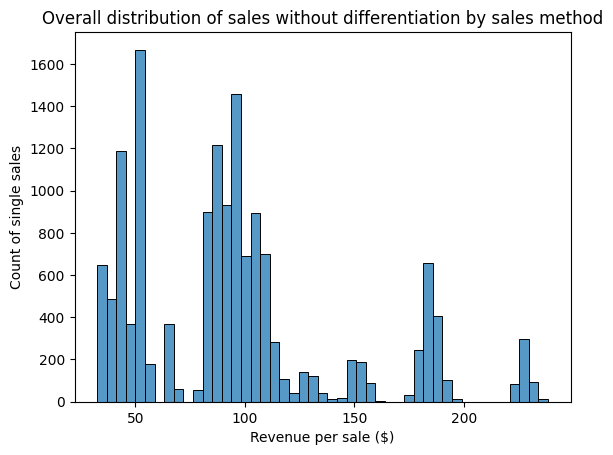

In [46]:
sns.histplot(data=sales,x="revenue")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales without differentiation by sales method")


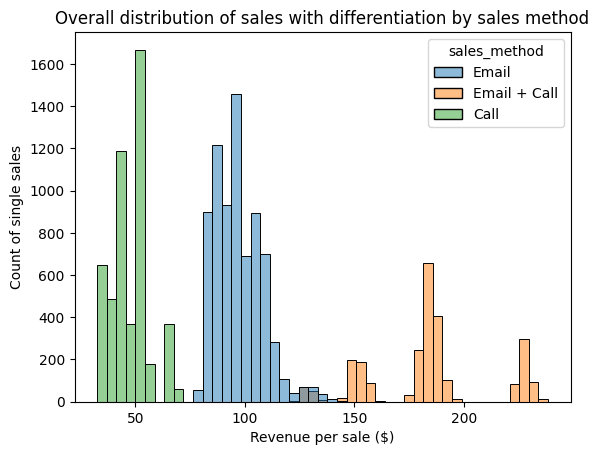

In [10]:
sns.histplot(data=sales,x="revenue",hue="sales_method")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales with differentiation by sales method")
plt.show()

### Revenue over time

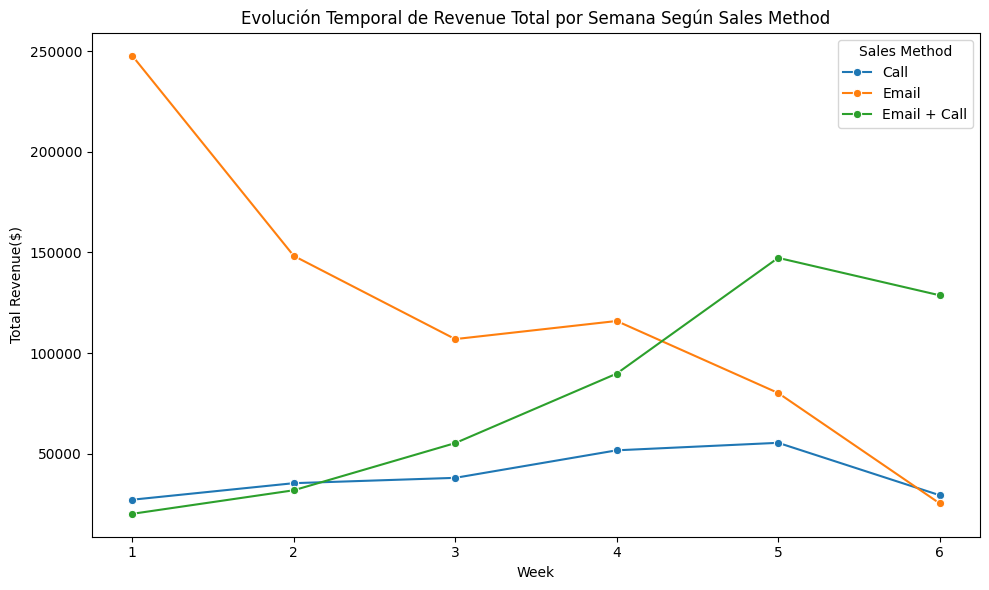

In [11]:

grouped_data = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='week', y='revenue', hue='sales_method', marker='o')


plt.title('Evolución Temporal de Revenue Total por Semana Según Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue($)')
plt.legend(title='Sales Method')
plt.tight_layout()


plt.show()

In [24]:
sales.groupby("sales_method")["nb_site_visits"].max()

sales_method
Call            41
Email           37
Email + Call    37
Name: nb_site_visits, dtype: int64

In [20]:
sales.groupby("sales_method")["years_as_customer"].median()

sales_method
Call            4.0
Email           3.0
Email + Call    3.0
Name: years_as_customer, dtype: float64

In [43]:
revenue_by_sales_method = sales.groupby('sales_method')['revenue'].sum()

# Calcula el ingreso total para usar en el cálculo del porcentaje
total_revenue = revenue_by_sales_method.sum()

# Calcula el porcentaje del ingreso total para cada método de venta
percentage_of_total_revenue = (revenue_by_sales_method / total_revenue) * 100

percentage_of_total_revenue

sales_method
Call            16.494377
Email           50.527986
Email + Call    32.977637
Name: revenue, dtype: float64

<AxesSubplot: xlabel='years_as_customer', ylabel='revenue'>

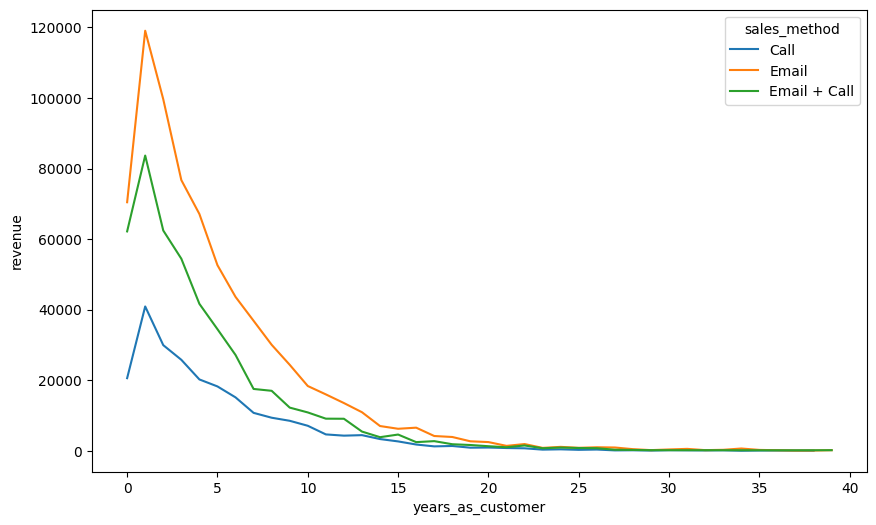

In [22]:

grouped_data2 = sales[sales["years_as_customer"]<40].groupby(['years_as_customer', 'sales_method'])['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data2, x='years_as_customer', y='revenue', hue='sales_method')


<AxesSubplot: xlabel='nb_site_visits', ylabel='revenue'>

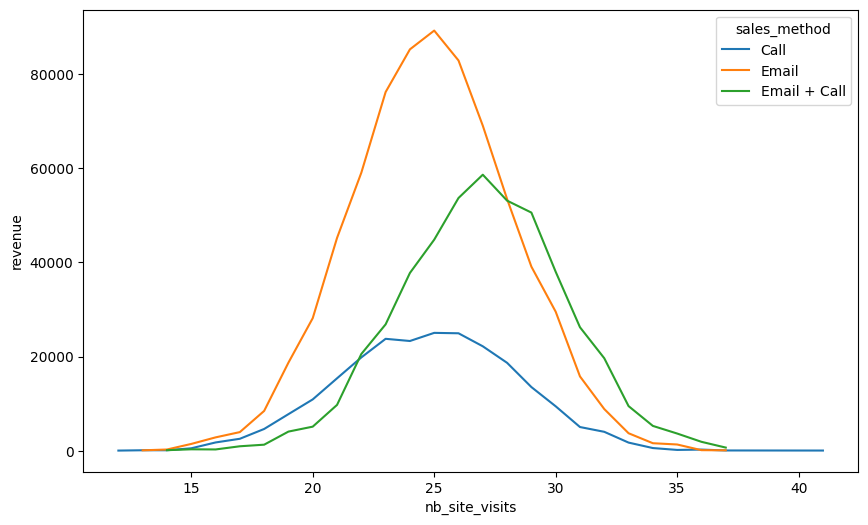

In [24]:
grouped_data3 = sales.groupby(['nb_site_visits', 'sales_method'])['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data3, x='nb_site_visits', y='revenue', hue='sales_method')

<AxesSubplot: xlabel='week', ylabel='revenue'>

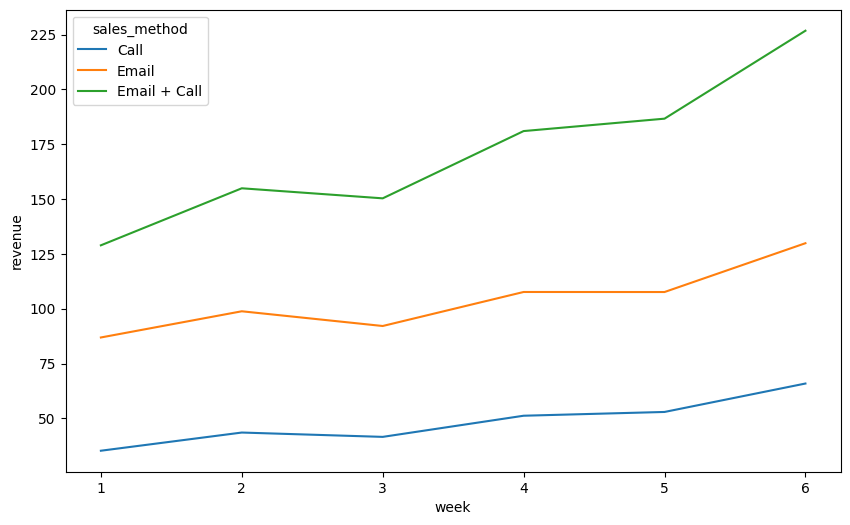

In [28]:
grouped_data4 = sales.groupby(['week', 'sales_method'])['revenue'].median().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data4, y='revenue', x='week', hue='sales_method')

# Report for Head of Analytics

## Data Validation

The first step of our analysis is checking if there are any duplicated rows or if there are any missing values. There are no duplicated rows, and there are 1074 missing values in the column revenue.

Then, we are going to analyse every column separately:
- week: int, values are 1 to 6 and there is nothing odd.
- sales_method: str, there are 5 categories and it should be 3 according to the notes. So, we merge 'Email' and 'email' and we do  same with 'em + call' and 'Email + Call'
- customer_id: str, every customer id is different, so we have to keep in mind that we cannot analyse multi purchases or behaviours over time of a single customer
- nb_sold: int, the number new products sold looks fine, ranges from 7 to 16, though the number 15 looks a fit inflated
- revenue: real, this column has 1074 missing values. Our method to replace those will be with the median groping by the sales method since they seem like different samples in a histogram. Range is fine, from 32.54  to 238.32 
- years_as_customer: int, there are two points which makes to sense, since the company is 40 years old, and there are two customer, one from 63 and other from 47 years ago. Since the rest of value are fine, we will not remove those.
- nb_site_vists: int, looks normal. Ranges from 12 to 41.
- state: str, looks fine. There are more sales in the coastside states than in the middle and north states.
        


## Exploratory analysis

Once the data has been cleaned up, we are able to proceed with the explorory analysis.

We will be addressing the points the Sales Rep required:

- How many customers were there for each approach?
 
In this case, the answer, is just counting the number of customers for each method of sales. You can see the result in this barchart:

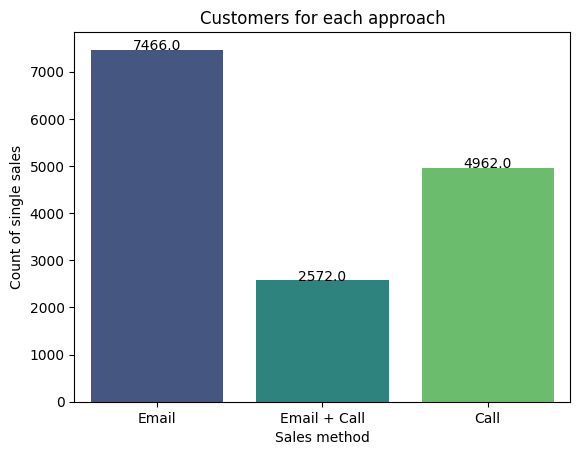

In [26]:
ax = sns.countplot(x="sales_method", data=sales, palette="viridis")


fig = plt.gcf()


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height}', ha="center")


plt.title("Customers for each approach")
plt.xlabel('Sales method')
plt.ylabel('Count of single sales')
plt.show()

- What does the spread of the revenue look like overall? And for each method?

The absolute and percentage spread of revenue por every sales method is:

1. Call: $ 236,445.16 (16.49%)
2. Email: $ 724,313.35 (50.53%)
3. Email + Call: $ 472,730.95 (32.98%)

As we can observe, the most significant sales method is 'Email', accounting for over half of the total income, followed by 'Email + Call' with almost 33%, and 'Call' is the least, contributing 16.49%.

Next, we will examine the distribution of individual sales, initially without distinguishing by sales method and subsequently differentiating by sales method using various colors.



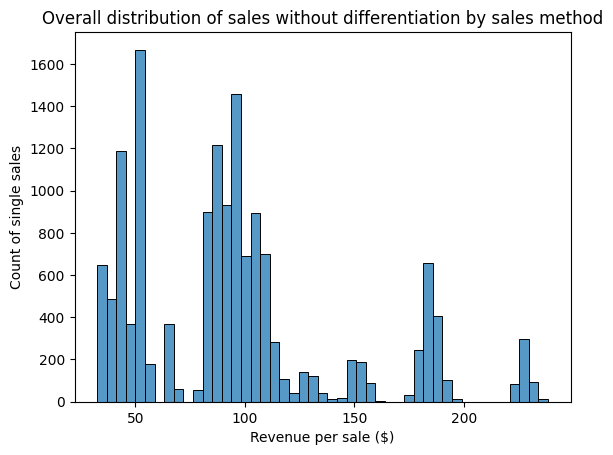

In [48]:
sns.histplot(data=sales,x="revenue")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales without differentiation by sales method")
plt.show()

Observing this histogram, we can understand there are different segments in this customer sample. We can observe one group around 50, then another around 100 and the last one over 150. Most of the observations are around 100.

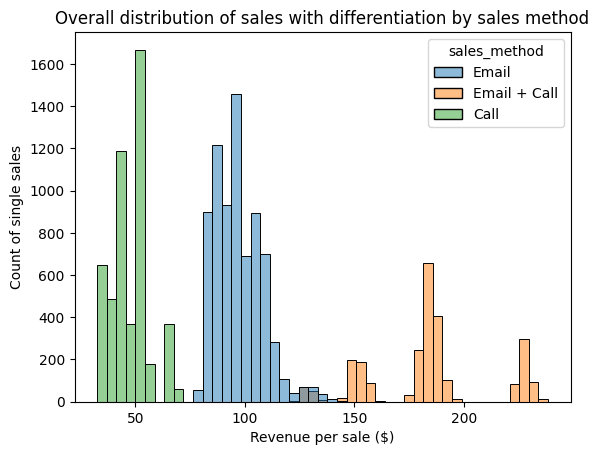

In [15]:
sns.histplot(data=sales,x="revenue",hue="sales_method")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales with differentiation by sales method")
plt.show()

 In this histogram, we can observe:

- The "Call" method generates the least revenue per sale, suggesting it might primarily facilitate commercial transactions rather than high-value sales.
- The "Email" method yields almost twice the revenue per sale compared to "Call," which is significant given its lower cost. Therefore, it should be a primary focus for the sales department.
- The "Email + Call" method shows a less uniform distribution but achieves the highest revenue per sale. This suggests a more personalized sales approach, likely leading to greater productivity.

Now we have a clear idea of the revenue distribution of the three sales methods. The next variable to observe is time:

- Was there any difference in revenue over time for each of the methods?

To answer this question, we have created a graph of total revenue per week for each sales method, so we can clearly see the evolution over time:

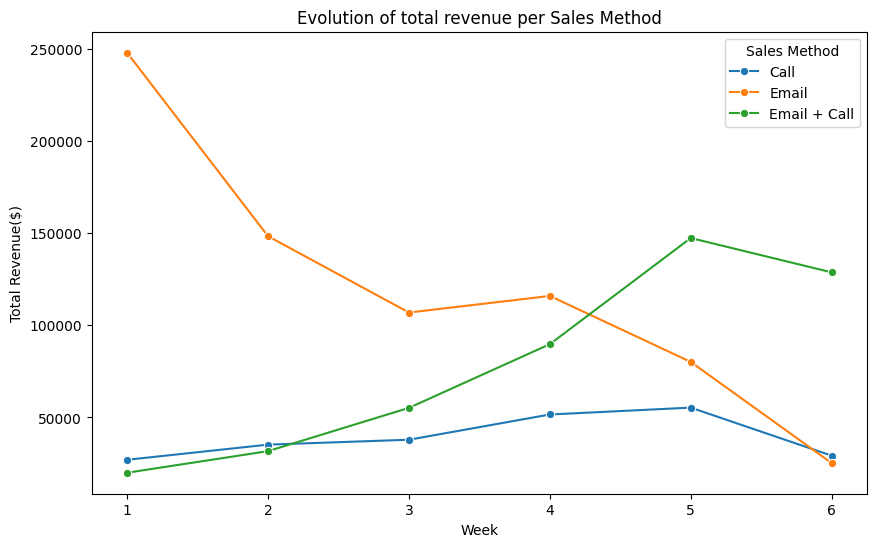

In [17]:

grouped_data = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='week', y='revenue', hue='sales_method', marker='o')


plt.title('Evolution of total revenue per Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue($)')
plt.legend(title='Sales Method')


plt.show()

In this graph, we can observe:

- The "Call" method generates an almost constant revenue over time, but this revelue is the lowest at almost all points.
- The "Email" method starts the cicle with the highest impact but decreases a lot over time, almost reaching the 0 at the end.
- The "Email + Call" method is the only one that increases over time, with makes it the most interesting method to invest in in the future.

Although we will address this at the end of the report, we will mention here that if we were to drop a method it would be 'Call', and the method we would encourage to do after the initial boom of 'Email' would be the 'Email + Call'.

Besides these, we have also performed analysis on 'years_as_customer' and 'nb_site_visits':

- For the 'years_as_customer', we have observed that most of the revenue come from customer with 5 or less years as a customer.

- For the 'nb_site_visits', we have observed that customers that visit the webpage regularly are the ones more willing to buy, but we would not say this is the most significant metric.

Regarding 'state', although the distribution is pretty uniform, we have seen that he coasts and south states are better customers than the middle and north ones.


## Metric for the business